双参数威布尔分布的概率密度函数为：

$$
f(t) = \frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta-1} \exp\left(-\left(\frac{t}{\eta}\right)^\beta\right)
$$

其中，$t$表示寿命，$\beta$、$\eta$分别为形状参数和特征尺度参数，均大于0。

对应双参数威布尔分布的失效率函数为：

$$
h(t) = \frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta - 1}
$$

可靠度函数为：

$$
R(t) = \exp\left(-\left(\frac{t}{\eta}\right)^\beta\right)
$$

In [111]:
from pymc import Weibull, Normal
import matplotlib.pyplot as plt
import arviz as az
import numpy as np
import pymc as pm
import sys
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../" * 0))
sys.path.insert(0, BASE_DIR)

from setting import plt

In [112]:
faults_time = np.array([2000, 2100, 2200, 2215, 2300, 2305, 2315, 2456, 2500, 2500])  # , 2600, 1500

with pm.Model() as model:
    # beta = pm.Normal("beta", mu=200, sigma=100)
    # eta = pm.Normal("eta", mu=1000, sigma=100)
    # gamma = pm.Uniform("gamma", 0, 5000)
    beta = pm.Uniform(r"$\beta$", 0, 50)
    eta = pm.Uniform(r"$\eta$", 0, 5000)
    faults = pm.Weibull("faults", alpha=beta, beta=eta, observed=faults_time)
    
    step = pm.NUTS()  # 采用的迭代函数
    trace = pm.sample(1000, tune=2000, step=step)

Multiprocess sampling (3 chains in 3 jobs)
INFO:pymc.sampling.mcmc:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [$\beta$, $\eta$]
INFO:pymc.sampling.mcmc:NUTS: [$\beta$, $\eta$]
INFO:pymc.sampling.mcmc:Multiprocess sampling (3 chains in 3 jobs)
NUTS: [$\beta$, $\eta$]
INFO:pymc.sampling.mcmc:NUTS: [$\beta$, $\eta$]


Sampling 3 chains for 2_000 tune and 1_000 draw iterations (6_000 + 3_000 draws total) took 18 seconds.
INFO:pymc.sampling.mcmc:Sampling 3 chains for 2_000 tune and 1_000 draw iterations (6_000 + 3_000 draws total) took 18 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
INFO:pymc.stats.convergence:We recommend running at least 4 chains for robust computation of convergence diagnostics


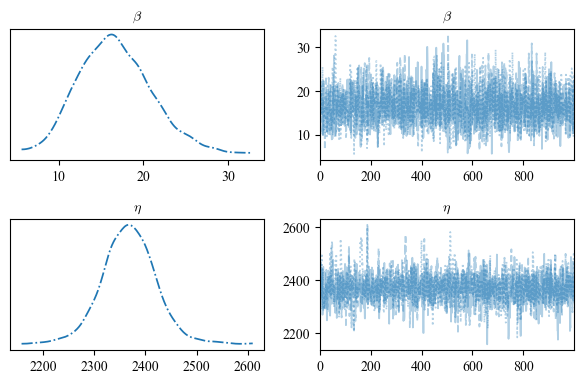

In [113]:
pm.model_graph.model_to_graphviz(model)
    
# 总结后验
# az.summary(trace, var_names=[r"beta", r"eta"])
az.plot_trace(trace, figsize=(6, 4), compact=True, legend=False, combined=True)
plt.tight_layout()

In [114]:
def weibull(x, beta, eta):
    """
    威布尔分布函数
    """
    return (beta / eta) * (x / eta) ** (beta - 1) * np.exp(-(x / eta) ** beta)

In [115]:
# idx = 0
# betas = trace["posterior"]["beta"].values[0, :]
# etas = trace["posterior"]["eta"].values[0, :]
with model:
    params_map = pm.find_MAP(vars=[beta, eta])

In [118]:
params_map
beta_map = params_map[r"$\beta$"]
eta_map = params_map[r"$\eta$"]

In [ ]:
beta_map, eta_map

(array(16.87674365), array(2361.95506978))

Text(0, 0.5, 'probability density')

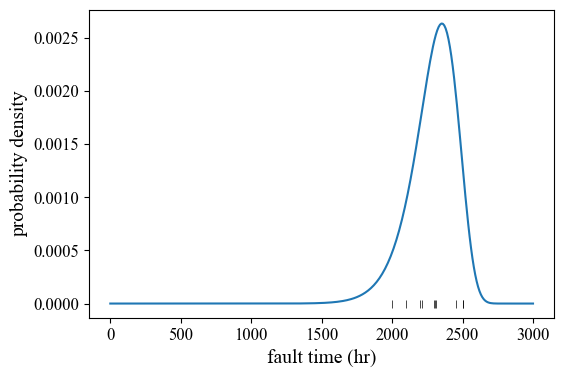

In [123]:
time = np.arange(0, 3000 + 10, 10)
pdf = weibull(time, beta_map, eta_map)
plt.figure(figsize=(6, 4))
plt.plot(time, pdf)
plt.scatter(faults_time, np.zeros_like(faults_time), marker="|", c="k", alpha=1, linewidths=0.5)
plt.xlabel("fault time (hr)")
plt.ylabel("probability density")